In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier as rc
import warnings
from IPython.core.interactiveshell import InteractiveShell


warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
InteractiveShell.ast_node_interactivity ='all'
sns.set_style('darkgrid')
your_data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
print(your_data.shape)
mapping = {'FAVC':'Eat_high_caloric_food','FCVC':'Eat_vegetables_in_meal','NCP':'Meals_daily',
           'CAEC':'Food_between_meals','CH2O':'Amt_water_daily','SCC':'calories_monitoring',
           'FAF':'physical_activity','TUE':'Amt_tech',
           'NObeyesdad':'Weight_category','CALC':'Alcohol_consumption'}
for column in mapping.keys():
    your_data.columns = your_data.columns.str.replace(column,mapping[column])
your_data.Age = your_data['Age'].round(decimals=0)
your_data.Weight = your_data['Weight'].round(decimals=0)
your_data.Height = your_data['Height'].round(decimals=2)
your_data.Eat_vegetables_in_meal = your_data['Eat_vegetables_in_meal'].round(decimals=0)
your_data.Amt_water_daily = your_data['Amt_water_daily'].round(decimals=0)
your_data.physical_activity = your_data['physical_activity'].round(decimals=0)
your_data.Amt_tech = your_data['Amt_tech'].round(decimals=0)
your_data.Meals_daily = your_data['Meals_daily'].round(decimals=0)

(2111, 17)


In [2]:
print(your_data.isnull().sum()/len(your_data))

Gender                            0.0
Age                               0.0
Height                            0.0
Weight                            0.0
family_history_with_overweight    0.0
Eat_high_caloric_food             0.0
Eat_vegetables_in_meal            0.0
Meals_daily                       0.0
Food_between_meals                0.0
SMOKE                             0.0
Amt_water_daily                   0.0
calories_monitoring               0.0
physical_activity                 0.0
Amt_tech                          0.0
Alcohol_consumption               0.0
MTRANS                            0.0
Weight_category                   0.0
dtype: float64


Text(0.5, 1.0, 'Gender')

<BarContainer object of 2 artists>

[Text(0, 0, 'Male'), Text(1, 0, 'Female')]

Text(0.5, 0, 'Categories')

Text(0, 8, '(1068.00 50.59%)')

Text(0, 8, '(1043.00 49.41%)')

Text(0.5, 1.0, 'Age')

<BarContainer object of 6 artists>

[Text(0, 0, '(21.833, 29.667]'),
 Text(1, 0, '(13.952, 21.833]'),
 Text(2, 0, '(29.667, 37.5]'),
 Text(3, 0, '(37.5, 45.333]'),
 Text(4, 0, '(45.333, 53.167]'),
 Text(5, 0, '(53.167, 61.0]')]

Text(0.5, 0, 'Categories')

Text(0, 8, '(867.00 41.07%)')

Text(0, 8, '(858.00 40.64%)')

Text(0, 8, '(256.00 12.13%)')

Text(0, 8, '(116.00 5.50%)')

Text(0, 8, '(7.00 0.33%)')

Text(0, 8, '(7.00 0.33%)')

Text(0.5, 1.0, 'Height')

<BarContainer object of 6 artists>

[Text(0, 0, '(1.715, 1.803]'),
 Text(1, 0, '(1.627, 1.715]'),
 Text(2, 0, '(1.538, 1.627]'),
 Text(3, 0, '(1.803, 1.892]'),
 Text(4, 0, '(1.4480000000000002, 1.538]'),
 Text(5, 0, '(1.892, 1.98]')]

Text(0.5, 0, 'Categories')

Text(0, 8, '(662.00 31.36%)')

Text(0, 8, '(661.00 31.31%)')

Text(0, 8, '(412.00 19.52%)')

Text(0, 8, '(263.00 12.46%)')

Text(0, 8, '(82.00 3.88%)')

Text(0, 8, '(31.00 1.47%)')

Text(0.5, 1.0, 'Weight')

<BarContainer object of 6 artists>

[Text(0, 0, '(61.333, 83.667]'),
 Text(1, 0, '(83.667, 106.0]'),
 Text(2, 0, '(38.865, 61.333]'),
 Text(3, 0, '(106.0, 128.333]'),
 Text(4, 0, '(128.333, 150.667]'),
 Text(5, 0, '(150.667, 173.0]')]

Text(0.5, 0, 'Categories')

Text(0, 8, '(648.00 30.70%)')

Text(0, 8, '(494.00 23.40%)')

Text(0, 8, '(431.00 20.42%)')

Text(0, 8, '(398.00 18.85%)')

Text(0, 8, '(119.00 5.64%)')

Text(0, 8, '(21.00 0.99%)')

Text(0.5, 1.0, 'family_history_with_overweight')

<BarContainer object of 2 artists>

[Text(0, 0, 'yes'), Text(1, 0, 'no')]

Text(0.5, 0, 'Categories')

Text(0, 8, '(1726.00 81.76%)')

Text(0, 8, '(385.00 18.24%)')

Text(0.5, 1.0, 'Eat_high_caloric_food')

<BarContainer object of 2 artists>

[Text(0, 0, 'yes'), Text(1, 0, 'no')]

Text(0.5, 0, 'Categories')

Text(0, 8, '(1866.00 88.39%)')

Text(0, 8, '(245.00 11.61%)')

Text(0.5, 1.0, 'Eat_vegetables_in_meal')

<BarContainer object of 3 artists>

[Text(0, 0, '2.0'), Text(1, 0, '3.0'), Text(2, 0, '1.0')]

Text(0.5, 0, 'Categories')

Text(0, 8, '(1013.00 47.99%)')

Text(0, 8, '(996.00 47.18%)')

Text(0, 8, '(102.00 4.83%)')

Text(0.5, 1.0, 'Meals_daily')

<BarContainer object of 4 artists>

[Text(0, 0, '3.0'), Text(1, 0, '1.0'), Text(2, 0, '2.0'), Text(3, 0, '4.0')]

Text(0.5, 0, 'Categories')

Text(0, 8, '(1470.00 69.64%)')

Text(0, 8, '(316.00 14.97%)')

Text(0, 8, '(176.00 8.34%)')

Text(0, 8, '(149.00 7.06%)')

Text(0.5, 1.0, 'Food_between_meals')

<BarContainer object of 4 artists>

[Text(0, 0, 'Sometimes'),
 Text(1, 0, 'Frequently'),
 Text(2, 0, 'Always'),
 Text(3, 0, 'no')]

Text(0.5, 0, 'Categories')

Text(0, 8, '(1765.00 83.61%)')

Text(0, 8, '(242.00 11.46%)')

Text(0, 8, '(53.00 2.51%)')

Text(0, 8, '(51.00 2.42%)')

Text(0.5, 1.0, 'SMOKE')

<BarContainer object of 2 artists>

[Text(0, 0, 'no'), Text(1, 0, 'yes')]

Text(0.5, 0, 'Categories')

Text(0, 8, '(2067.00 97.92%)')

Text(0, 8, '(44.00 2.08%)')

Text(0.5, 1.0, 'Amt_water_daily')

<BarContainer object of 3 artists>

[Text(0, 0, '2.0'), Text(1, 0, '3.0'), Text(2, 0, '1.0')]

Text(0.5, 0, 'Categories')

Text(0, 8, '(1110.00 52.58%)')

Text(0, 8, '(516.00 24.44%)')

Text(0, 8, '(485.00 22.97%)')

Text(0.5, 1.0, 'calories_monitoring')

<BarContainer object of 2 artists>

[Text(0, 0, 'no'), Text(1, 0, 'yes')]

Text(0.5, 0, 'Categories')

Text(0, 8, '(2015.00 95.45%)')

Text(0, 8, '(96.00 4.55%)')

Text(0.5, 1.0, 'physical_activity')

<BarContainer object of 4 artists>

[Text(0, 0, '1.0'), Text(1, 0, '0.0'), Text(2, 0, '2.0'), Text(3, 0, '3.0')]

Text(0.5, 0, 'Categories')

Text(0, 8, '(776.00 36.76%)')

Text(0, 8, '(720.00 34.11%)')

Text(0, 8, '(496.00 23.50%)')

Text(0, 8, '(119.00 5.64%)')

Text(0.5, 1.0, 'Amt_tech')

<BarContainer object of 3 artists>

[Text(0, 0, '0.0'), Text(1, 0, '1.0'), Text(2, 0, '2.0')]

Text(0.5, 0, 'Categories')

Text(0, 8, '(952.00 45.10%)')

Text(0, 8, '(915.00 43.34%)')

Text(0, 8, '(244.00 11.56%)')

Text(0.5, 1.0, 'Alcohol_consumption')

<BarContainer object of 4 artists>

[Text(0, 0, 'Sometimes'),
 Text(1, 0, 'no'),
 Text(2, 0, 'Frequently'),
 Text(3, 0, 'Always')]

Text(0.5, 0, 'Categories')

Text(0, 8, '(1401.00 66.37%)')

Text(0, 8, '(639.00 30.27%)')

Text(0, 8, '(70.00 3.32%)')

Text(0, 8, '(1.00 0.05%)')

Text(0.5, 1.0, 'MTRANS')

<BarContainer object of 5 artists>

[Text(0, 0, 'Public_Transportation'),
 Text(1, 0, 'Automobile'),
 Text(2, 0, 'Walking'),
 Text(3, 0, 'Motorbike'),
 Text(4, 0, 'Bike')]

Text(0.5, 0, 'Categories')

Text(0, 8, '(1580.00 74.85%)')

Text(0, 8, '(457.00 21.65%)')

Text(0, 8, '(56.00 2.65%)')

Text(0, 8, '(11.00 0.52%)')

Text(0, 8, '(7.00 0.33%)')

Text(0.5, 1.0, 'Weight_category')

<BarContainer object of 7 artists>

[Text(0, 0, 'Obesity_Type_I'),
 Text(1, 0, 'Obesity_Type_III'),
 Text(2, 0, 'Obesity_Type_II'),
 Text(3, 0, 'Overweight_Level_I'),
 Text(4, 0, 'Overweight_Level_II'),
 Text(5, 0, 'Normal_Weight'),
 Text(6, 0, 'Insufficient_Weight')]

Text(0.5, 0, 'Categories')

Text(0, 8, '(351.00 16.63%)')

Text(0, 8, '(324.00 15.35%)')

Text(0, 8, '(297.00 14.07%)')

Text(0, 8, '(290.00 13.74%)')

Text(0, 8, '(290.00 13.74%)')

Text(0, 8, '(287.00 13.60%)')

Text(0, 8, '(272.00 12.88%)')

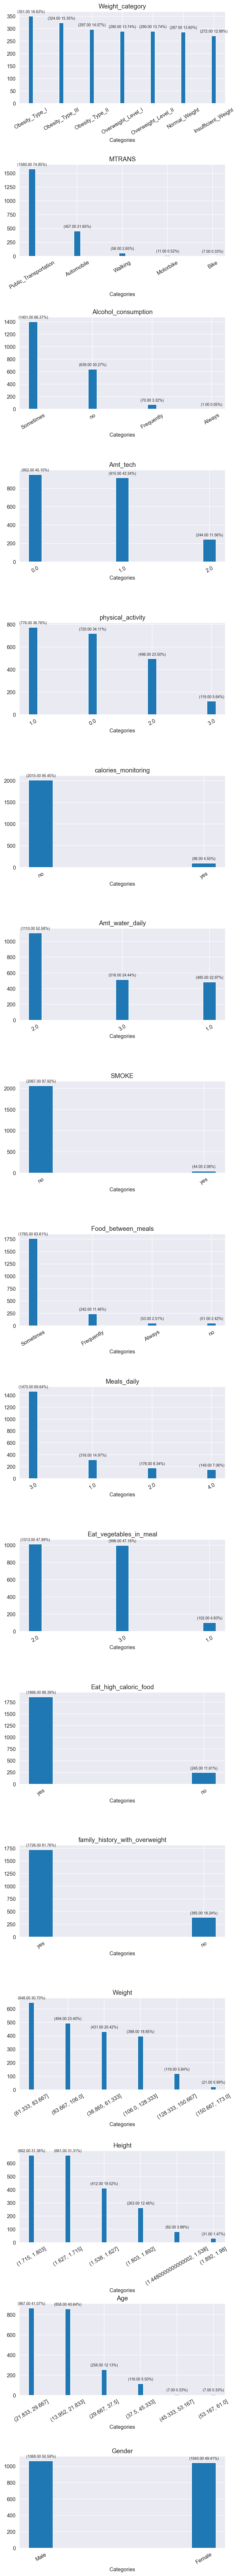

In [3]:
fig = plt.figure()
for i,column_name in enumerate(your_data.columns):
    if column_name == 'Age' or column_name == 'Weight' or column_name == 'Height':
        values = your_data[column_name].value_counts(bins=6)
    else:
        values = your_data[column_name].value_counts()
    n = np.arange(len(values.index.tolist()))
    ax = fig.add_axes([1,i,0.9,0.6])
    ax.set_title(values.name)
    ax.bar(n, values.tolist(),0.15)
    x_labels = values.index.tolist()
    ax.set_xticks(n)
    ax.set_xticklabels(x_labels, minor=False)
    ax.set_xlabel('Categories')
    for labels in ax.get_xticklabels():
        labels.set_rotation(30)
    for bar in ax.patches:
        st = str("(" + format(bar.get_height(),'.2f') + " " +
                format((bar.get_height()/your_data.shape[0])*100,'.2f') + "%" + ")")
        ax.annotate(st,
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=7, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

In [4]:
encoded_gender = pd.get_dummies(your_data.Gender,drop_first=True)
ordered_FAVC = {'no':0,'yes':1}
binary_smoke = pd.get_dummies(your_data.SMOKE,drop_first=True)
encoded_scc = pd.get_dummies(your_data.calories_monitoring,drop_first=True)
encoded_trans = pd.get_dummies(your_data.MTRANS,prefix='TRANS')
your_data = pd.concat([your_data,encoded_trans],axis=1)
your_data.Gender = encoded_gender
your_data.SMOKE = binary_smoke
your_data.calories_monitoring = encoded_scc
encoded_family_history = {'no':0,'yes':1}
ordered_encoded_CAEC = {'no':0,'Sometimes':1,'Frequently':2,'Always':3}
ordered_CALC = {'no':0,'Sometimes':1, 'Frequently':2}
ordered_weight = {'Insufficient_Weight':0,'Normal_Weight':1,'Overweight_Level_I':2,
                  'Overweight_Level_II':3,'Obesity_Type_I':4,'Obesity_Type_II':5,'Obesity_Type_III':6}
ordered_vegetables = {1:0,2:1,3:2}
your_data.family_history_with_overweight = your_data.family_history_with_overweight.map(encoded_family_history)
your_data.Eat_high_caloric_food = your_data.Eat_high_caloric_food.map(ordered_FAVC)
your_data.Food_between_meals = your_data.Food_between_meals.map(ordered_encoded_CAEC)
your_data.Alcohol_consumption = your_data.Alcohol_consumption.map(ordered_CALC)
your_data.Weight_category = your_data.Weight_category.map(ordered_weight)
your_data.Eat_vegetables_in_meal = your_data.Eat_vegetables_in_meal.map(ordered_vegetables)
your_data = your_data.drop(['MTRANS'],axis=1)
your_data = your_data.drop(['TRANS_Walking','TRANS_Bike'],axis=1)
your_data = your_data.astype(float)

In [5]:
#pd.set_option('display.width',100)
pd.set_option('display.precision',2)
your_data.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,Eat_high_caloric_food,Eat_vegetables_in_meal,Meals_daily,Food_between_meals,SMOKE,Amt_water_daily,calories_monitoring,physical_activity,Amt_tech,Alcohol_consumption,Weight_category,TRANS_Automobile,TRANS_Motorbike,TRANS_Public_Transportation
count,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2110.00,2111.00,2111.00,2.11e+03,2111.00
mean,0.51,24.32,1.70,86.59,0.82,0.88,1.42,2.69,1.14,0.02,2.01,0.05,1.01,0.66,0.73,3.11,0.22,5.21e-03,0.75
std,0.50,6.36,0.09,26.19,0.39,0.32,0.58,0.81,0.47,0.14,0.69,0.21,0.90,0.67,0.51,1.99,0.41,7.20e-02,0.43
min,0.00,14.00,1.45,39.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00e+00,0.00
25%,0.00,20.00,1.63,65.50,1.00,1.00,1.00,3.00,1.00,0.00,2.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00e+00,0.00
50%,1.00,23.00,1.70,83.00,1.00,1.00,1.00,3.00,1.00,0.00,2.00,0.00,1.00,1.00,1.00,3.00,0.00,0.00e+00,1.00
75%,1.00,26.00,1.77,107.00,1.00,1.00,2.00,3.00,1.00,0.00,2.00,0.00,2.00,1.00,1.00,5.00,0.00,0.00e+00,1.00
max,1.00,61.00,1.98,173.00,1.00,1.00,2.00,4.00,3.00,1.00,3.00,1.00,3.00,2.00,2.00,6.00,1.00,1.00e+00,1.00


<AxesSubplot:>

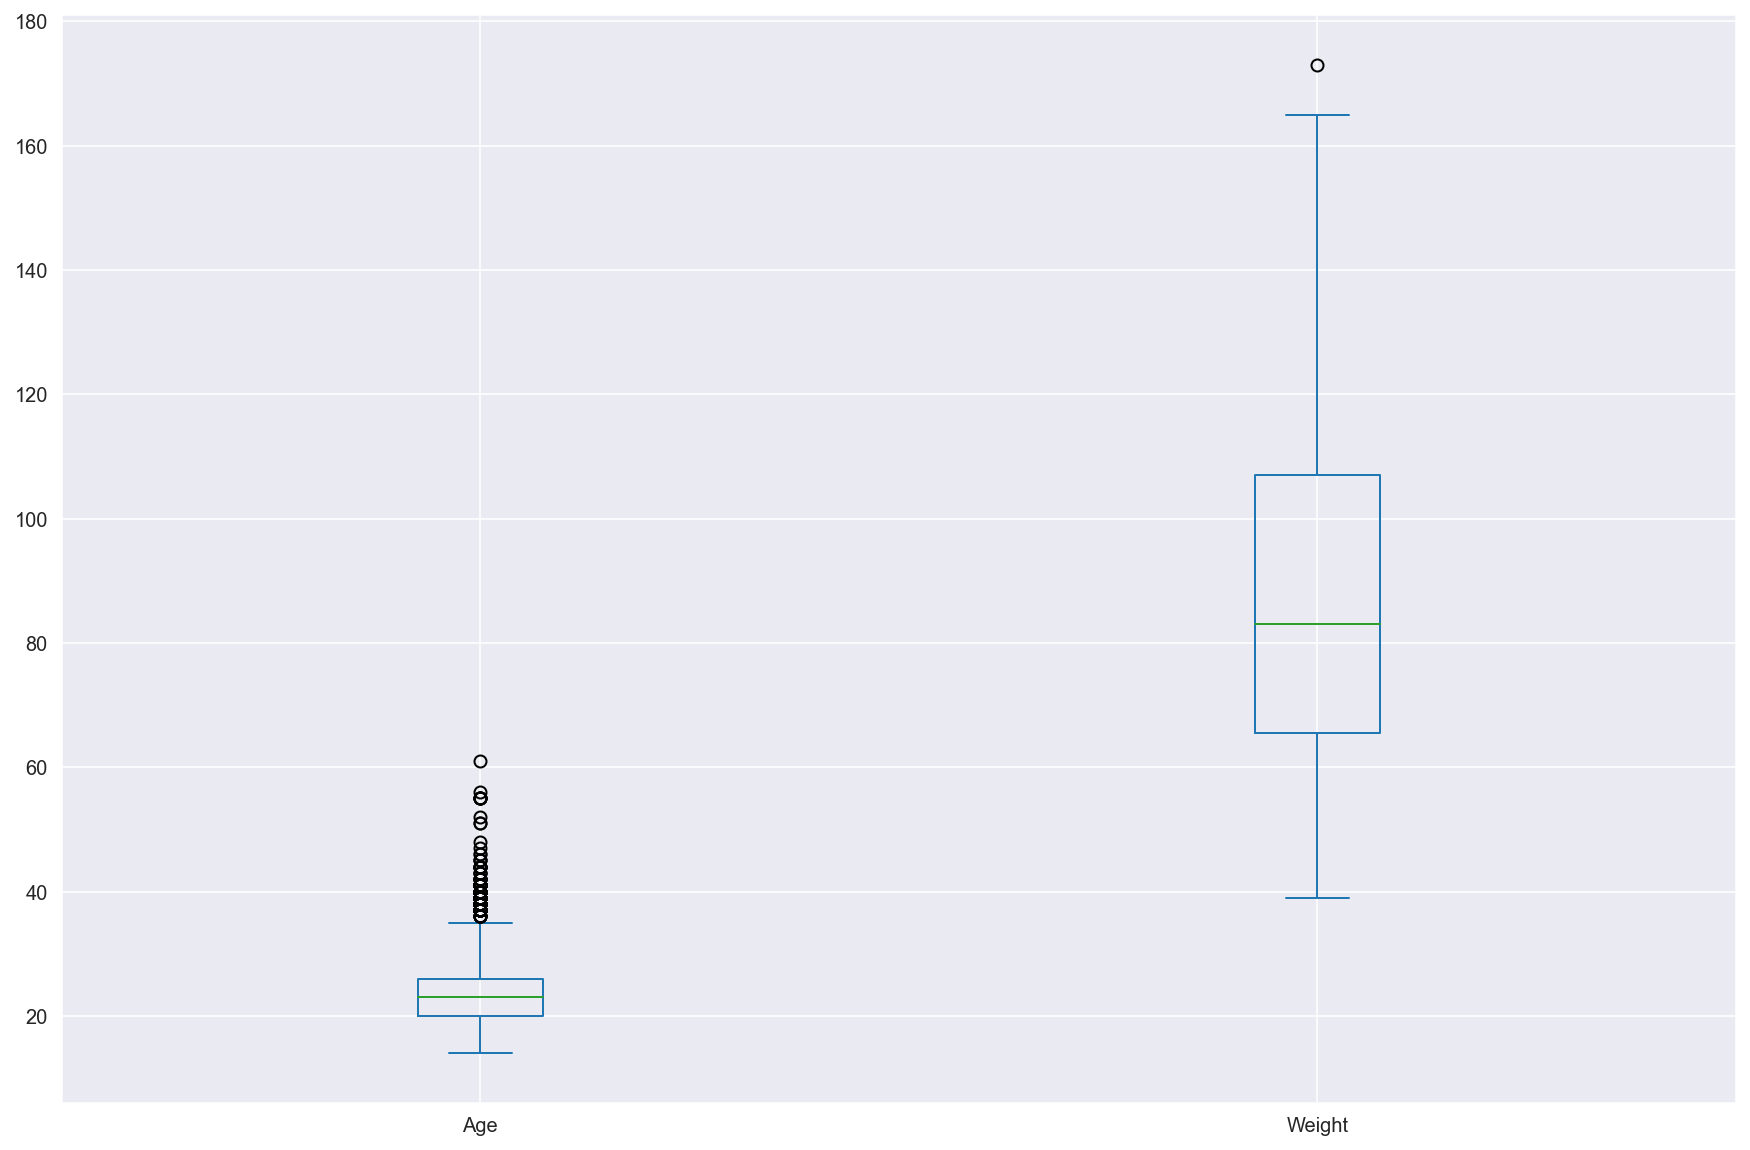

In [6]:
_, ax = plt.subplots(figsize=(15,10))
your_data.drop(['Gender','Eat_high_caloric_food','family_history_with_overweight','calories_monitoring','TRANS_Automobile','TRANS_Motorbike','TRANS_Public_Transportation','Food_between_meals','Alcohol_consumption','SMOKE','Amt_tech','Amt_water_daily','Weight_category','Meals_daily','Eat_vegetables_in_meal','physical_activity','Height'],axis=1).plot(kind='box',ax=ax)

<AxesSubplot:>

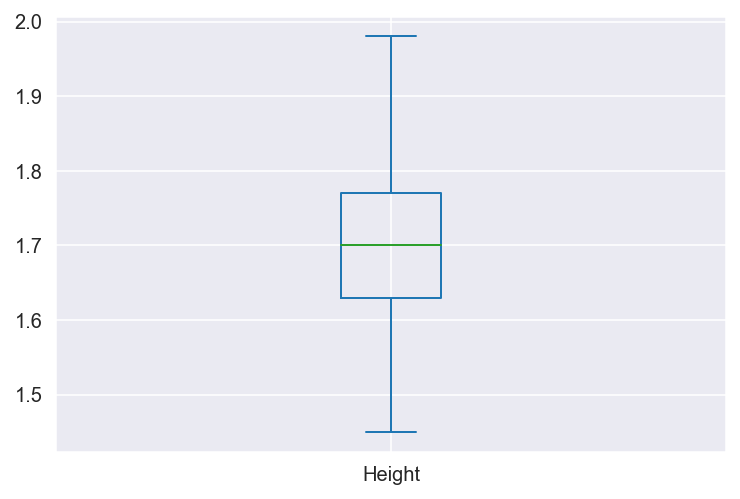

In [7]:
your_data.Height.plot(kind='box')

array([[<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Weight'}>],
       [<AxesSubplot:title={'center':'family_history_with_overweight'}>,
        <AxesSubplot:title={'center':'Eat_high_caloric_food'}>,
        <AxesSubplot:title={'center':'Eat_vegetables_in_meal'}>,
        <AxesSubplot:title={'center':'Meals_daily'}>],
       [<AxesSubplot:title={'center':'Food_between_meals'}>,
        <AxesSubplot:title={'center':'SMOKE'}>,
        <AxesSubplot:title={'center':'Amt_water_daily'}>,
        <AxesSubplot:title={'center':'calories_monitoring'}>],
       [<AxesSubplot:title={'center':'physical_activity'}>,
        <AxesSubplot:title={'center':'Amt_tech'}>,
        <AxesSubplot:title={'center':'Alcohol_consumption'}>,
        <AxesSubplot:title={'center':'Weight_category'}>],
       [<AxesSubplot:title={'center':'TRANS_Automobile'}>,
        <AxesSubplot:title={

Gender                           -2.37e-02
Age                               1.52e+00
Height                           -9.12e-03
Weight                            2.56e-01
family_history_with_overweight   -1.65e+00
Eat_high_caloric_food            -2.40e+00
Eat_vegetables_in_meal           -4.30e-01
Meals_daily                      -1.07e+00
Food_between_meals                1.91e+00
SMOKE                             6.71e+00
Amt_water_daily                  -1.90e-02
calories_monitoring               4.37e+00
physical_activity                 4.59e-01
Amt_tech                          5.21e-01
Alcohol_consumption              -2.74e-01
Weight_category                  -7.63e-02
TRANS_Automobile                  1.38e+00
TRANS_Motorbike                   1.38e+01
TRANS_Public_Transportation      -1.15e+00
dtype: float64

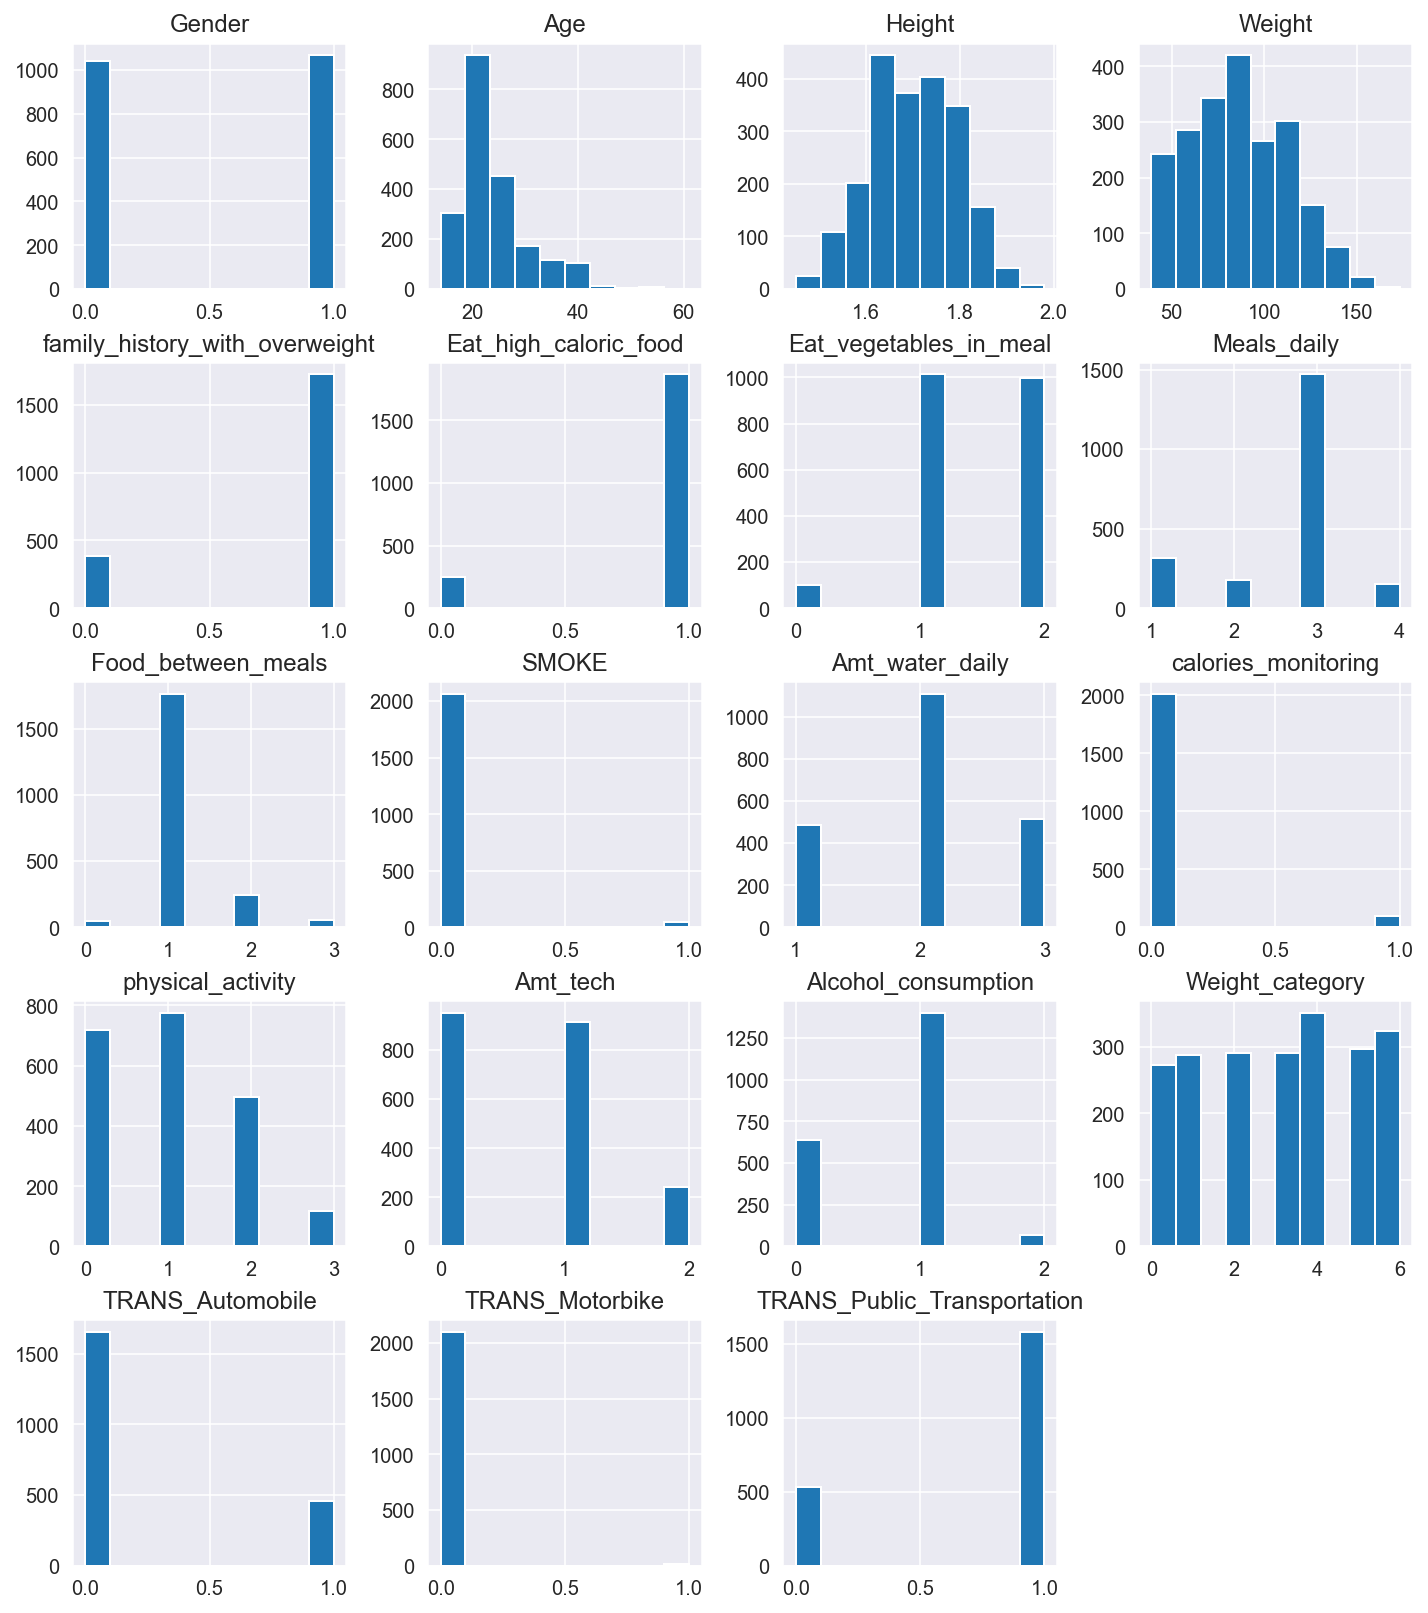

In [8]:
_, ax = plt.subplots(figsize=(12,14))
your_data.hist(ax=ax)
your_data.skew()
plt.show()

<AxesSubplot:>

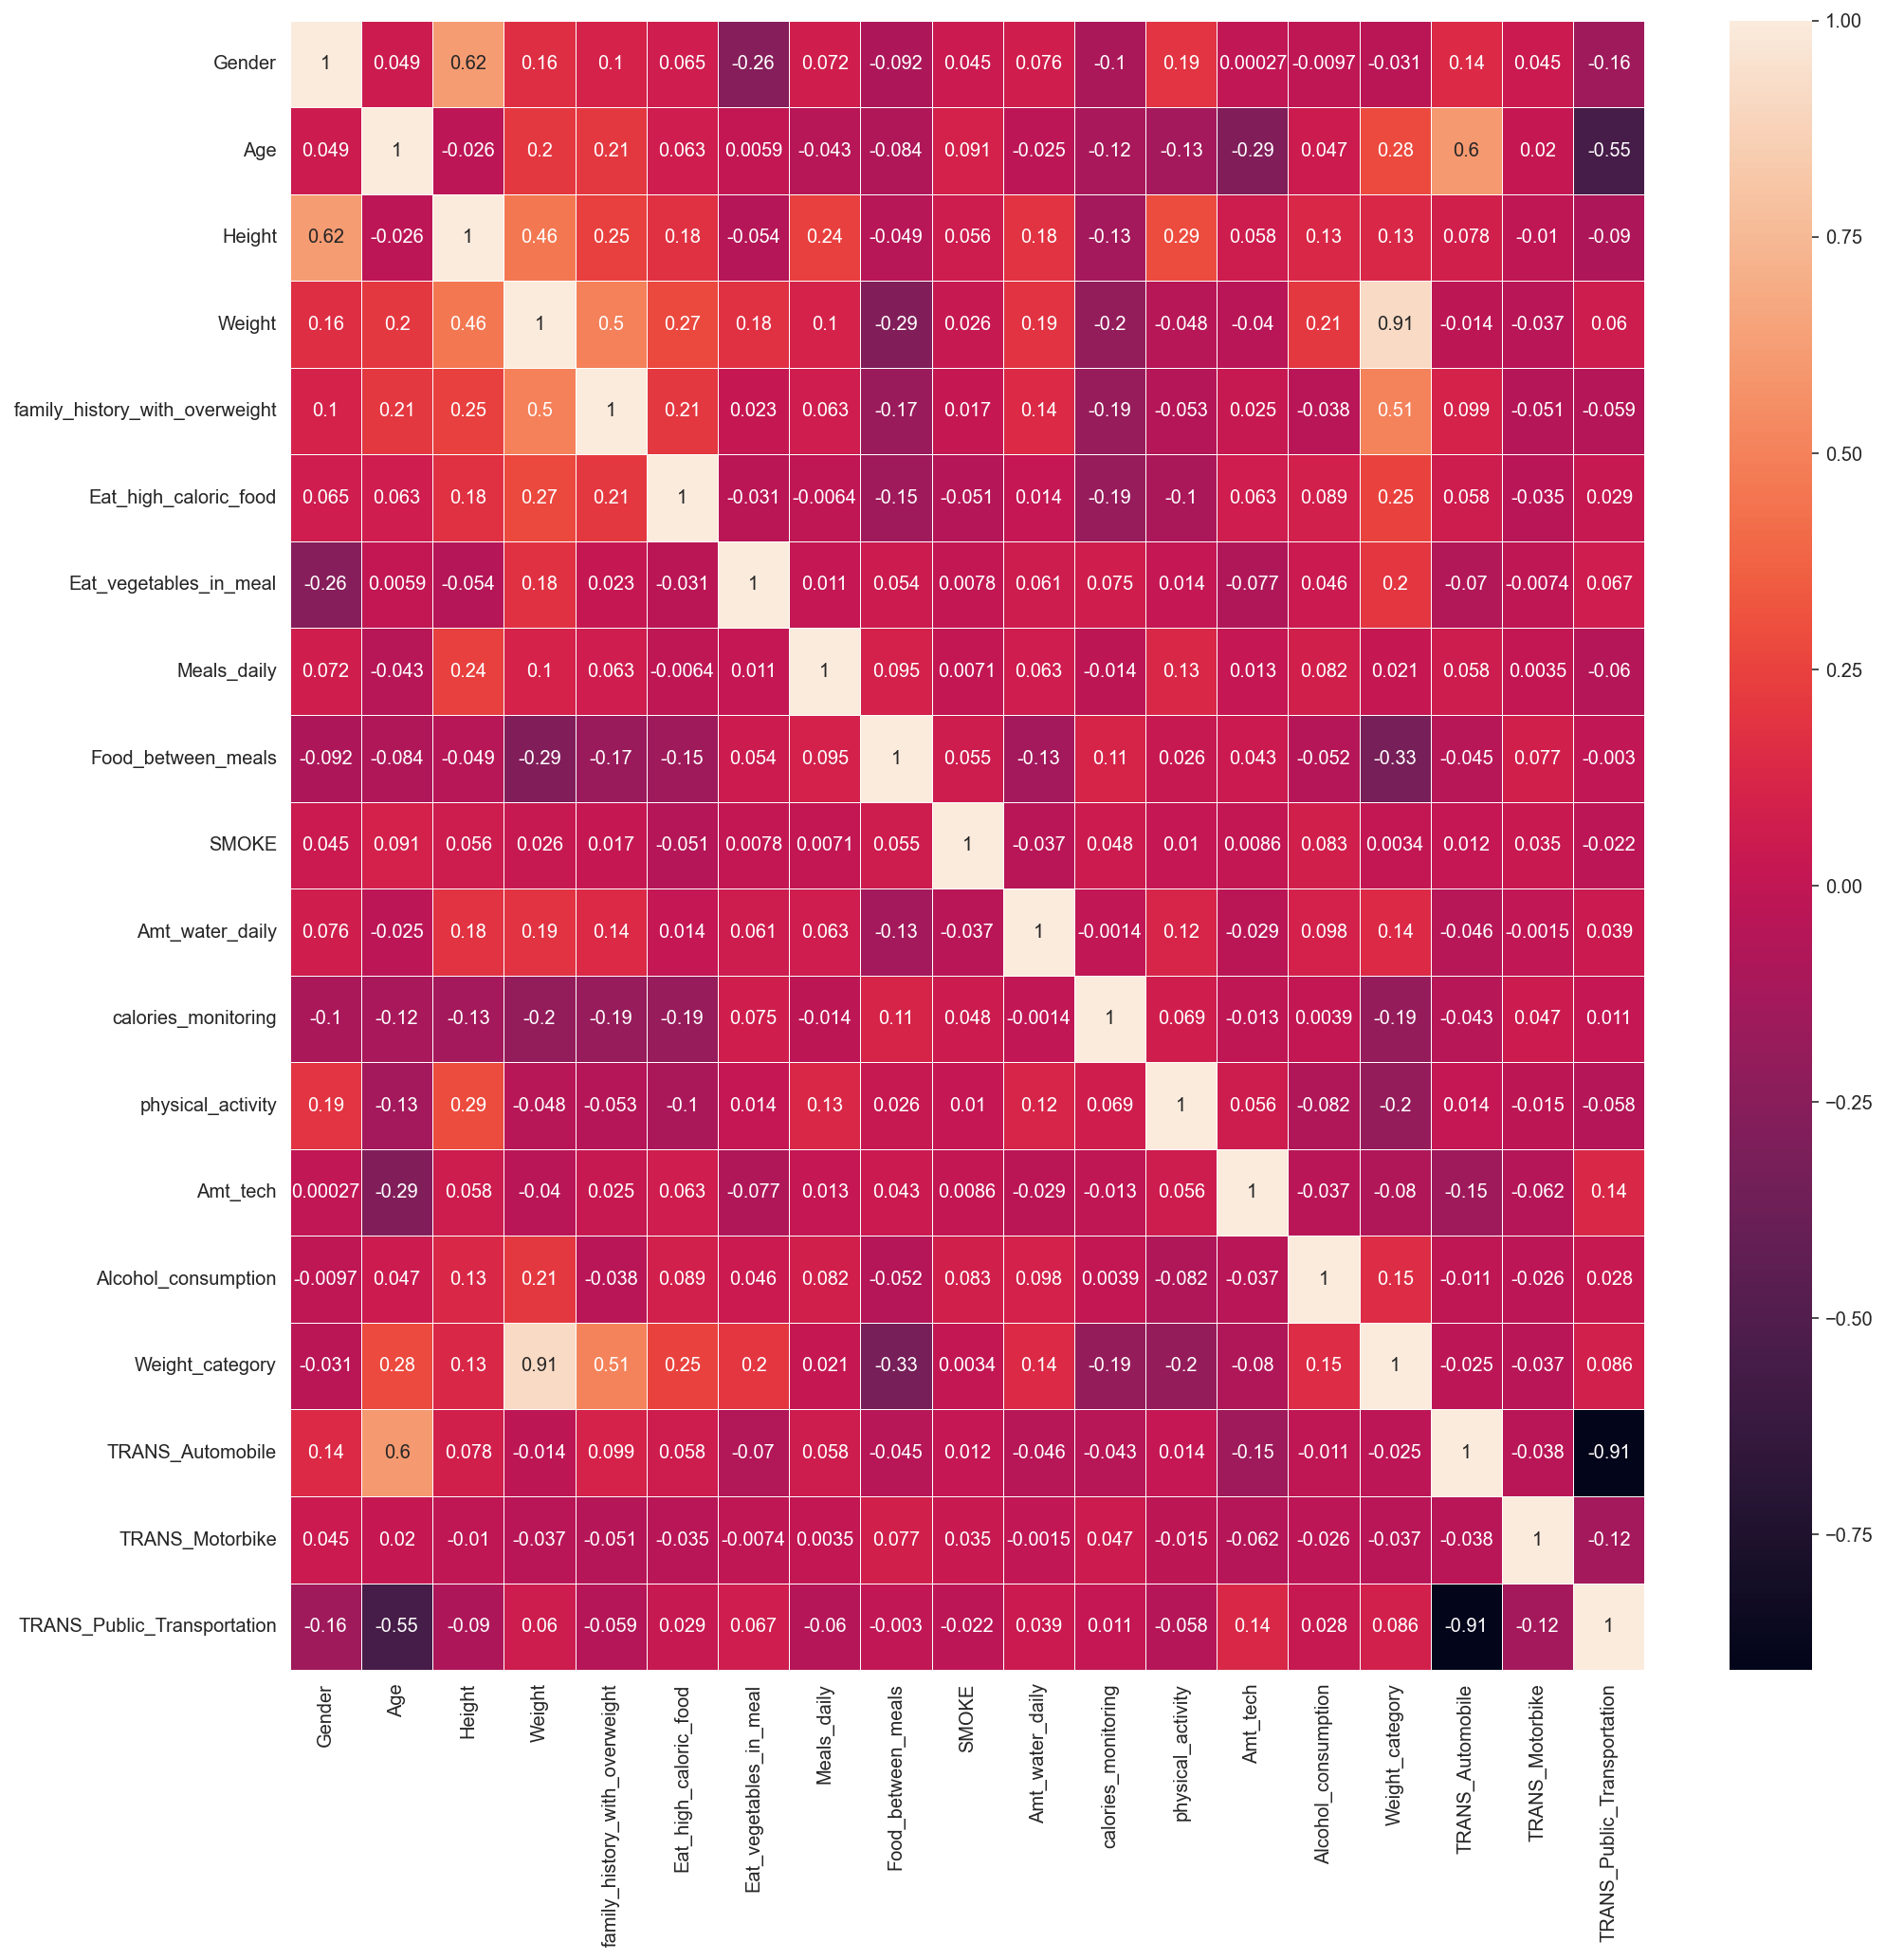

In [9]:
corr_matrix = your_data.corr()
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(corr_matrix,annot=True,linewidths=.5,ax=ax)
plt.show()

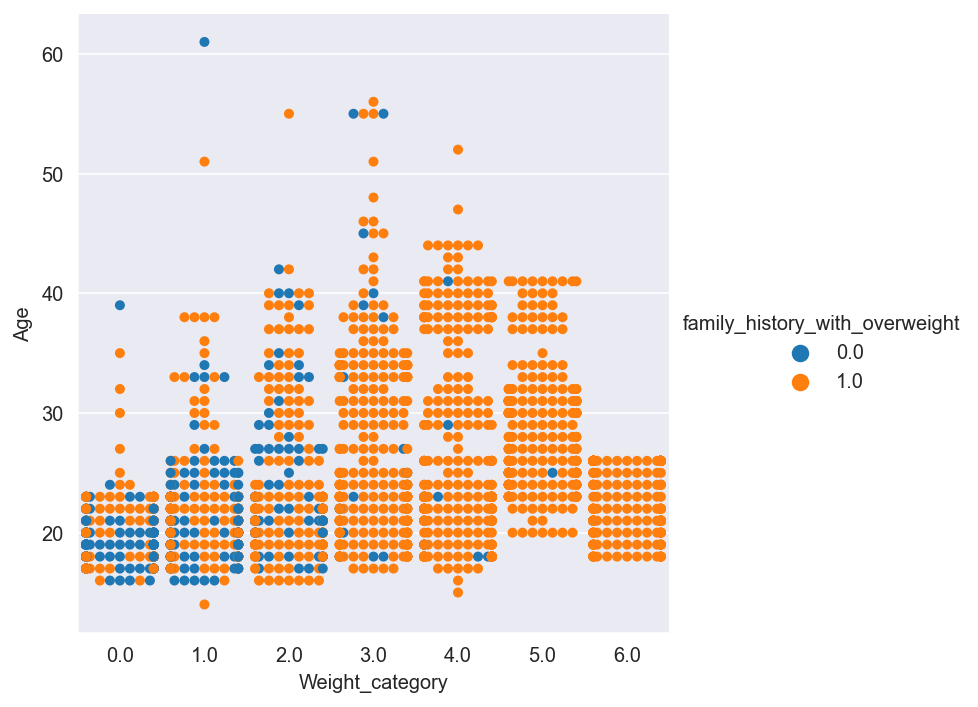

In [10]:
sns.catplot(y='Age',x='Weight_category',data=your_data,hue='family_history_with_overweight',kind='swarm')

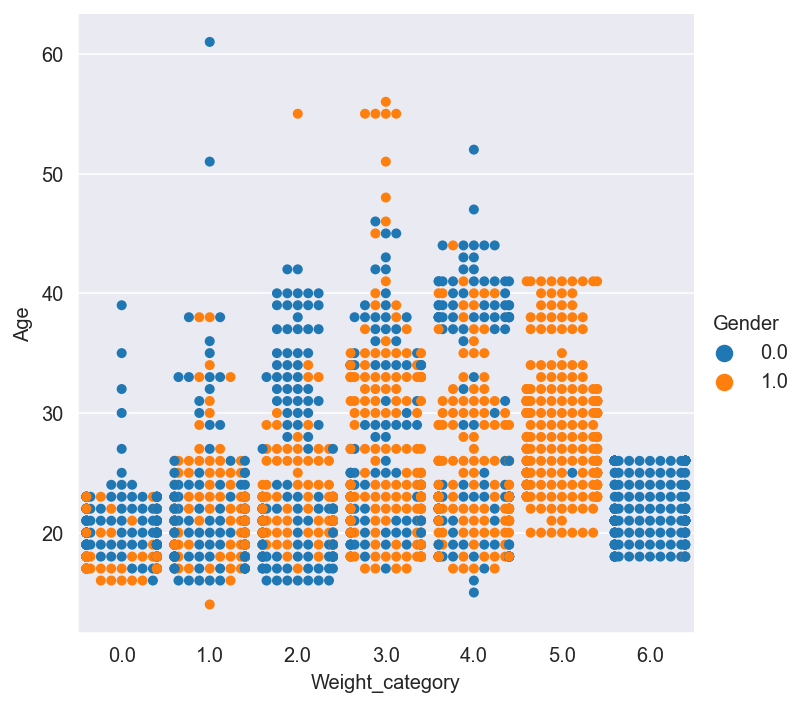

In [11]:
sns.catplot(y='Age',x='Weight_category',data=your_data,hue='Gender',kind='swarm')

<AxesSubplot:xlabel='Weight_category', ylabel='Age'>

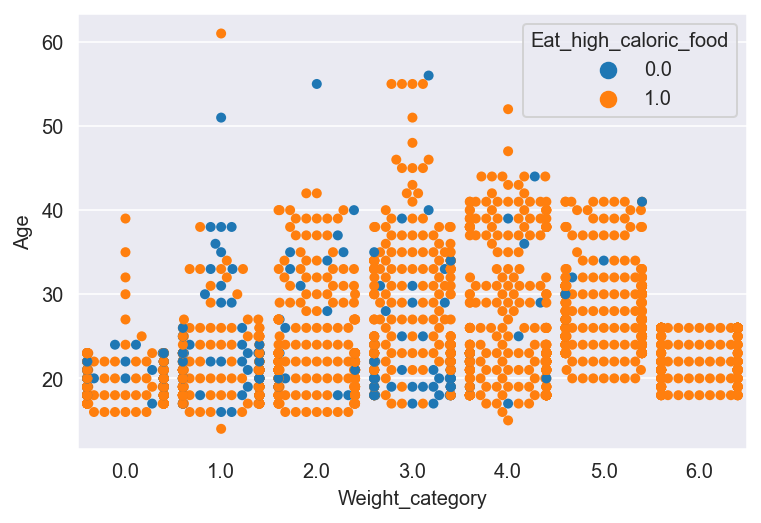

In [12]:
sns.swarmplot(y='Age',x='Weight_category',data=your_data,hue='Eat_high_caloric_food')

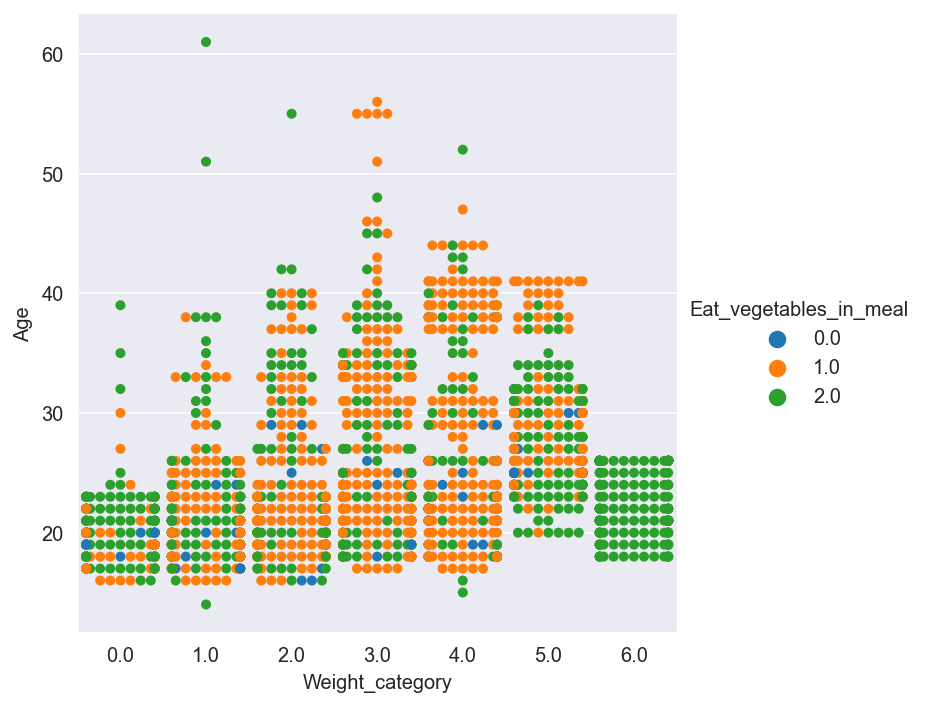

In [13]:
sns.catplot(y='Age',x='Weight_category',data=your_data,hue='Eat_vegetables_in_meal',kind='swarm')

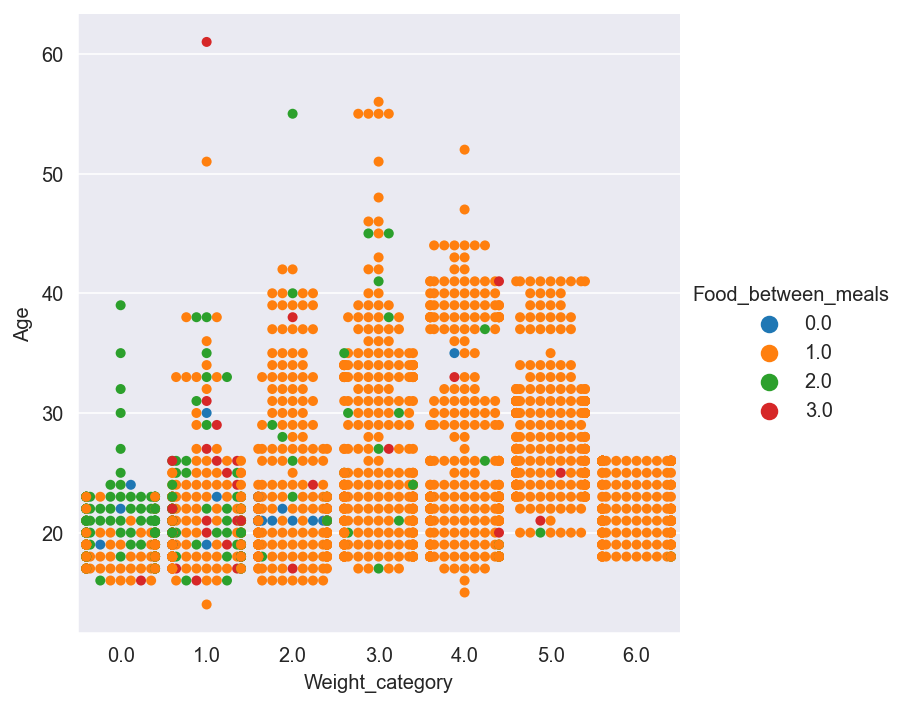

In [14]:
sns.catplot(y='Age',x='Weight_category',data=your_data,hue='Food_between_meals',kind='swarm')

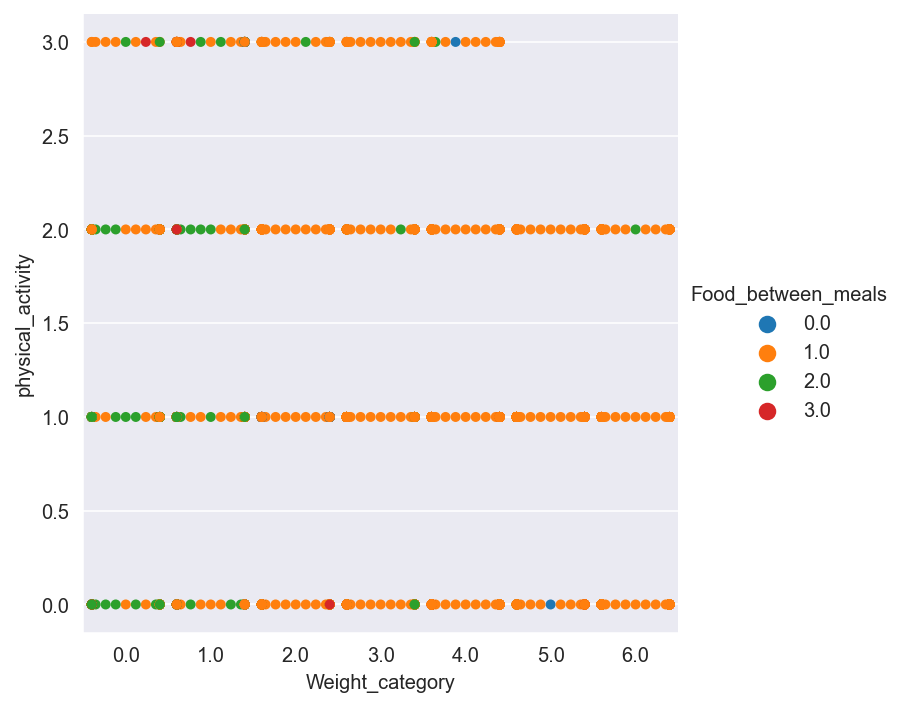

In [15]:
sns.catplot(y='physical_activity',x='Weight_category',data=your_data,hue='Food_between_meals',kind='swarm')

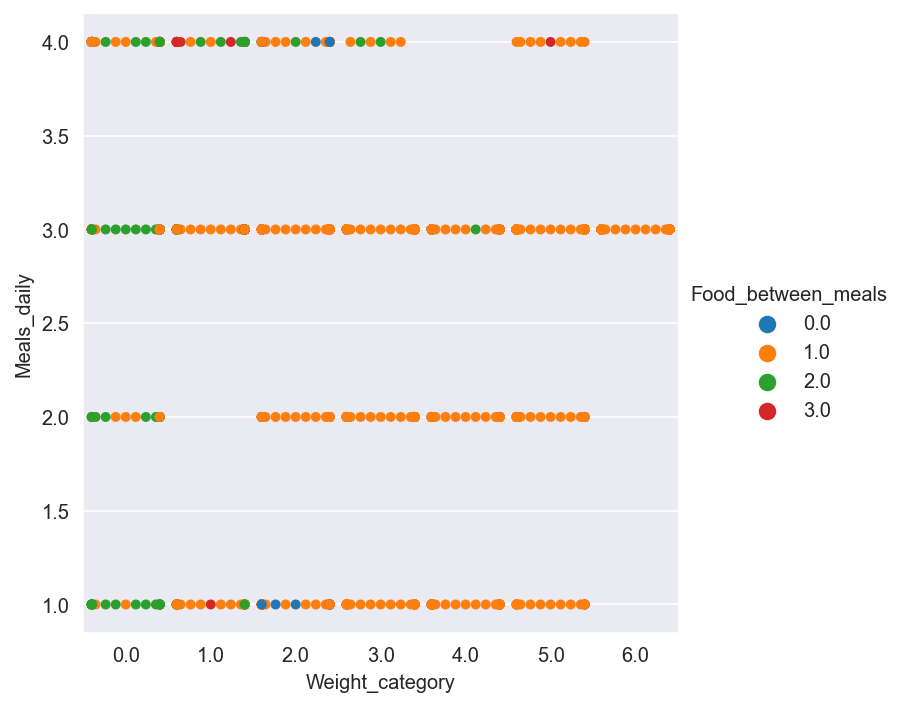

In [16]:
sns.catplot(y='Meals_daily',x='Weight_category',data=your_data,hue='Food_between_meals',kind='swarm')

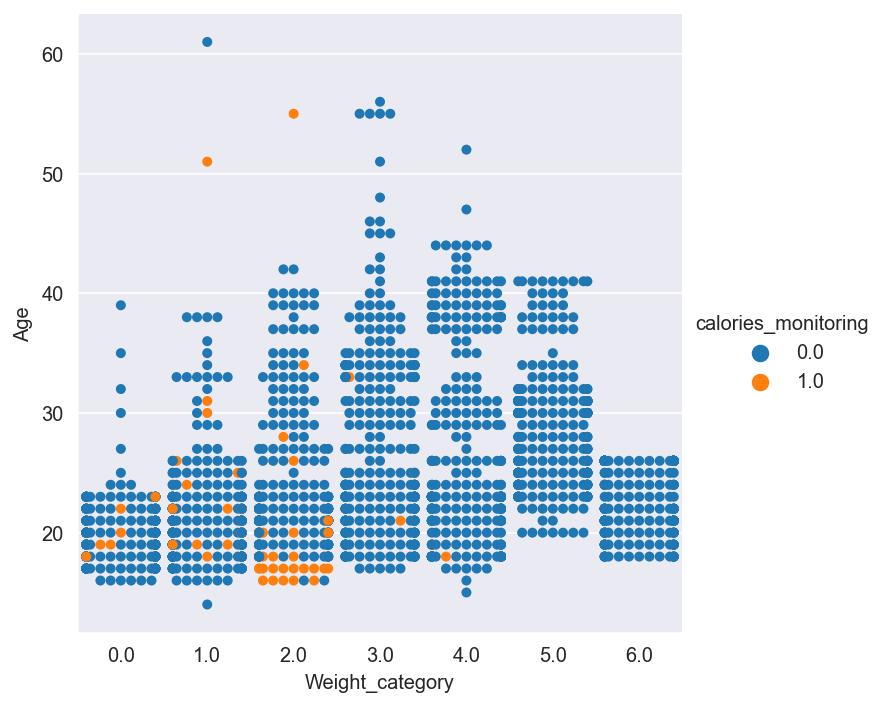

In [17]:
sns.catplot(y='Age',x='Weight_category',data=your_data,hue='calories_monitoring',kind='swarm')

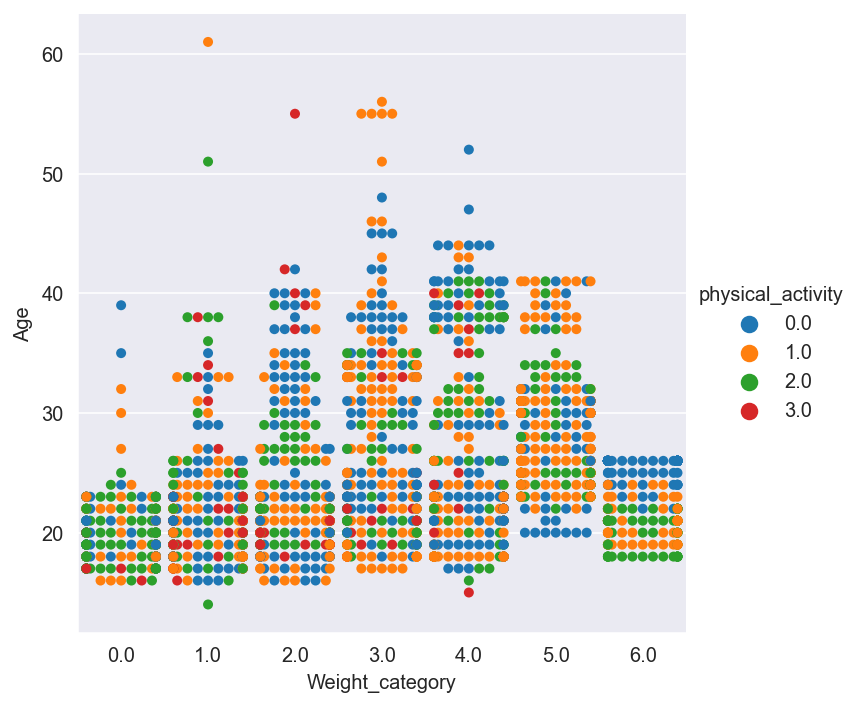

In [18]:
sns.catplot(y='Age',x='Weight_category',data=your_data,hue='physical_activity',kind='swarm')

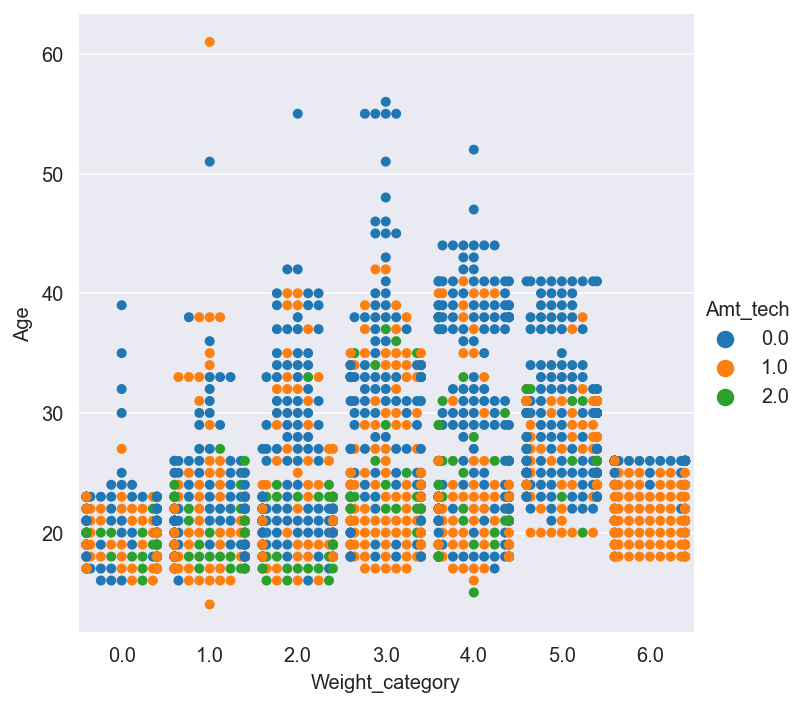

In [19]:
sns.catplot(y='Age',x='Weight_category',data=your_data,hue='Amt_tech',kind='swarm')

<AxesSubplot:xlabel='Weight_category', ylabel='Age'>

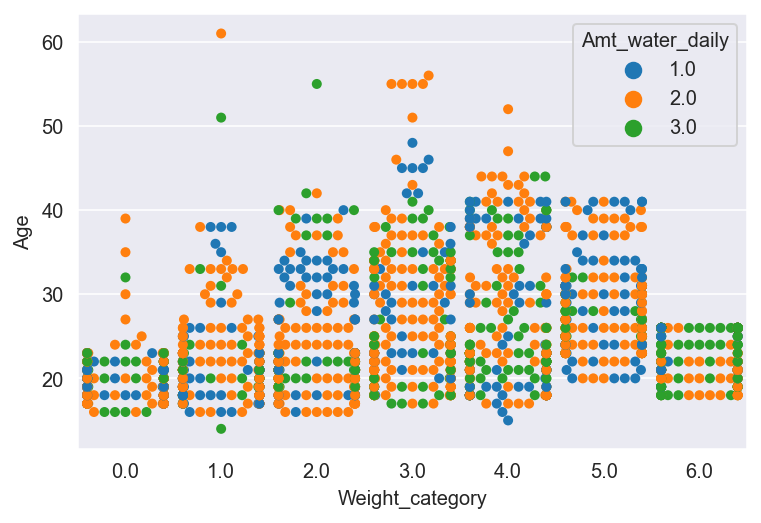

In [20]:
sns.swarmplot(y='Age',x='Weight_category',data=your_data,hue='Amt_water_daily')

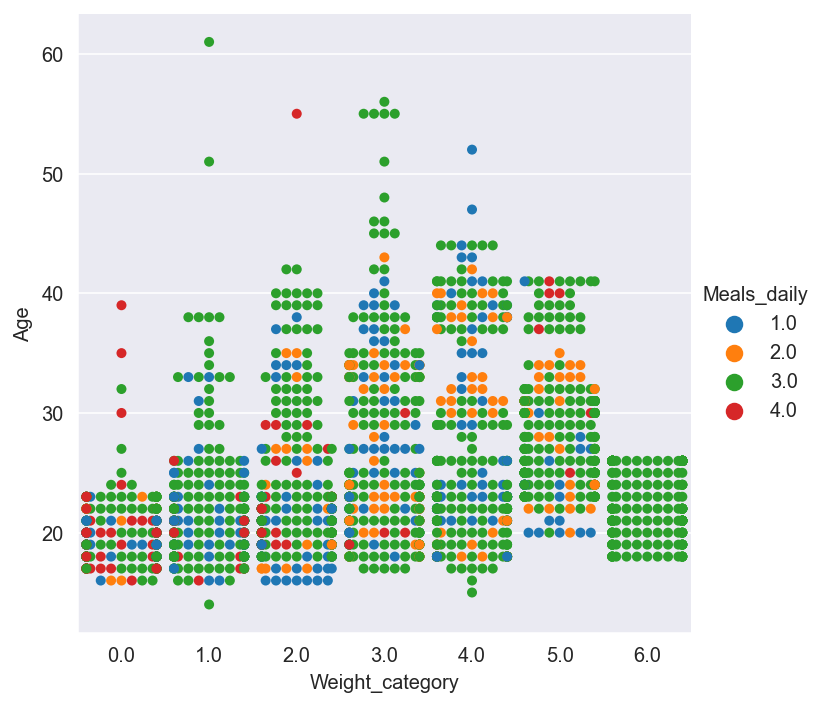

In [21]:
sns.catplot(y='Age',x='Weight_category',data=your_data,hue='Meals_daily',kind='swarm')

RandomForestClassifier(max_depth=20, random_state=1)

[Text(0, 0, 'family_history_with_overweight'),
 Text(0, 1, 'Amt_water_daily'),
 Text(0, 2, 'Amt_tech'),
 Text(0, 3, 'Food_between_meals'),
 Text(0, 4, 'Eat_vegetables_in_meal'),
 Text(0, 5, 'Alcohol_consumption'),
 Text(0, 6, 'Meals_daily'),
 Text(0, 7, 'physical_activity'),
 Text(0, 8, 'Gender'),
 Text(0, 9, 'Age')]

Text(0.5, 1.0, 'Feature importance')

[Text(0, 0, '0.06'),
 Text(0, 0, '0.06'),
 Text(0, 0, '0.06'),
 Text(0, 0, '0.07'),
 Text(0, 0, '0.08'),
 Text(0, 0, '0.08'),
 Text(0, 0, '0.08'),
 Text(0, 0, '0.08'),
 Text(0, 0, '0.09'),
 Text(0, 0, '0.22')]

Text(0.5, 0, 'percentage contribution')

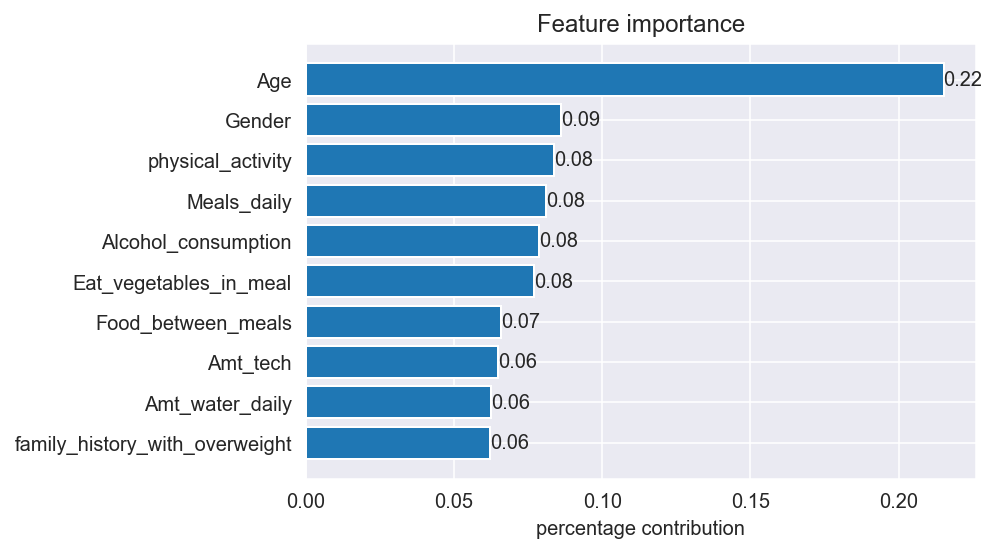

In [22]:
from sklearn.model_selection import train_test_split
rf_model = rc(random_state=1,max_depth=20)
X_data = your_data.drop(['Weight','Weight_category','Height'],axis=1)
X_data.fillna(value=1, inplace=True)
X_train, X_test, Y_train, Y_test = train_test_split(X_data,your_data.Weight_category,test_size=0.2,random_state=1)
rf_model.fit(X_train,Y_train)
features = your_data.drop(['Weight','Weight_category','Height'],axis=1).columns
important_features = rf_model.feature_importances_
np_array_indices = np.argsort(important_features)[-10:]
_,ax2 = plt.subplots()
hbars = ax2.barh(range(len(np_array_indices)),important_features[np_array_indices],align='center')
ax2.set_yticks(np.arange(len(np_array_indices)))
ax2.set_yticklabels([features[i] for i in np_array_indices])
ax2.set_title('Feature importance')
ax2.bar_label(hbars,fmt='%.2f')
ax2.set_xlabel('percentage contribution')
plt.show()

In [23]:
def gabby_normalizer(num,max,scale):
    if num == 0 and max == 1:
        return 0.0
    elif num == 0 and max != 1:
        percent = (100/(max+1))/100
        return float(percent * scale)
    elif num == 1 and max == 1:
        return float(scale)
    else:
        percent = (100*num/max)/100
        return percent * scale


[1.0, 3.0, 2.0, 3.0, 2.0, 2.0, 4.0, 3.0, 1.0, 61.0]
[6.        4.        3.        4.        6.        3.        4.5
 4.        6.        1.7704918]


(<a list of 20 Line2D ticklines objects>,
 [Text(0.0, 0, 'family_history_with_overweight'),
  Text(0.6283185307179586, 0, 'Amt_water_daily'),
  Text(1.2566370614359172, 0, 'Amt_tech'),
  Text(1.8849555921538759, 0, 'Food_between_meals'),
  Text(2.5132741228718345, 0, 'Eat_vegetables_in_meal'),
  Text(3.141592653589793, 0, 'Alcohol_consumption'),
  Text(3.7699111843077517, 0, 'Meals_daily'),
  Text(4.39822971502571, 0, 'physical_activity'),
  Text(5.026548245743669, 0, 'Gender'),
  Text(5.654866776461628, 0, 'Age')])

Text(0.5, 1.0, '(obesity type III, Normal weight)')

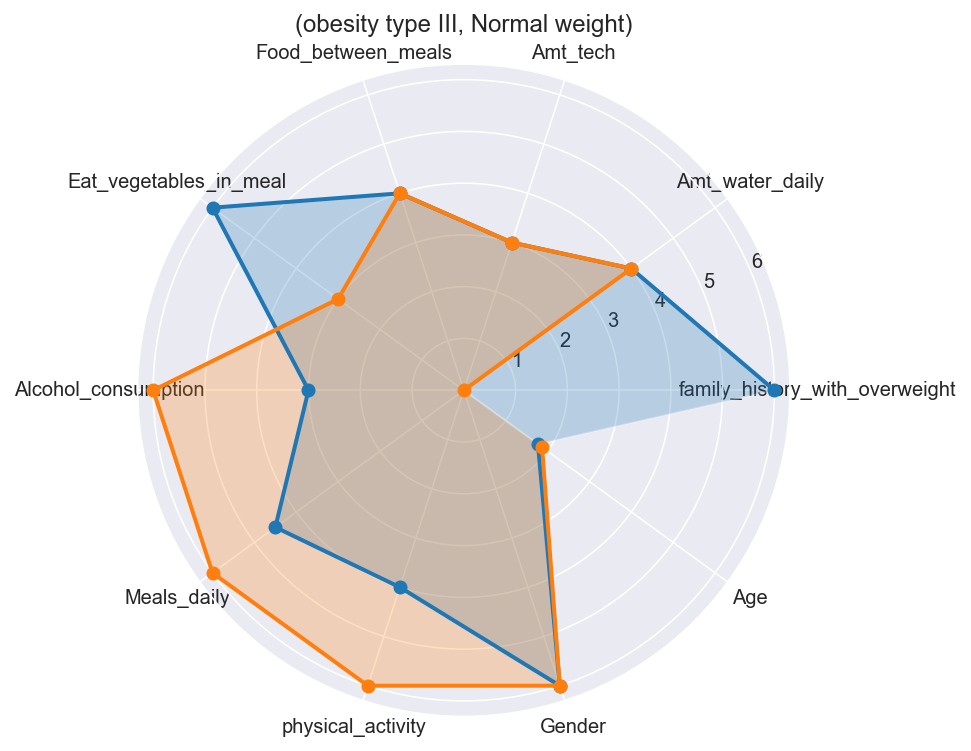

In [24]:
#RadarChart
radar_labels = np.array([features[i] for i in np_array_indices])
obesity_level_3_values = your_data.loc[your_data['Weight_category'] == 6]
obesity_max_row = obesity_level_3_values.loc[obesity_level_3_values['Weight'] ==  
                                             obesity_level_3_values['Weight'].max()] #get the max value of the weight feature in the obesity type 6 category
obesity_stats = obesity_max_row[[features[i] for i in np_array_indices]].values
max_values = [your_data[features[i]].max() for i in np_array_indices]
print(max_values)
obesity_stats = obesity_stats.reshape(-1)
for index,value in enumerate(obesity_stats):
    obesity_stats[index] = gabby_normalizer(value,max_values[index],6)
print(obesity_stats)
normal_weight_values = your_data.loc[your_data['Weight_category'] == 1]
normal_weight_max_row = normal_weight_values.loc[normal_weight_values['Weight'] == 
                                                 normal_weight_values['Weight'].max()]
normal_stats = normal_weight_max_row[[features[i] for i in np_array_indices]].values
normal_stats = normal_stats.reshape(-1)
for index,value in enumerate(normal_stats):
    normal_stats[index] = gabby_normalizer(value,max_values[index],6)
angles = np.linspace(0, 2 * np.pi, len(obesity_stats), endpoint=False)
obesity_stats = np.concatenate((obesity_stats,[obesity_stats[0]]),axis=None)
normal_stats = np.concatenate((normal_stats,[normal_stats[0]]),axis=None)
figure = plt.show()
_, ax = plt.subplots(figsize=(6,6),subplot_kw=dict(polar=True))
ax.plot(angles, obesity_stats[:10],'-o', linewidth=2)
ax.plot(angles, normal_stats[:10],'-o',linewidth=2)
ax.fill(angles, obesity_stats[:10],alpha=0.25)
ax.fill(angles,normal_stats[:10],alpha=0.25)
ax.set_thetagrids((angles * 180/np.pi)[0:10],[features[i] for i in np_array_indices])
ax.set_title('(obesity type III, Normal weight)')
ax.grid(True)

[1.0, 3.0, 2.0, 3.0, 2.0, 2.0, 4.0, 3.0, 1.0, 61.0]
[6.         6.         3.         4.         6.         3.
 4.5        2.         6.         2.26229508]


(<a list of 20 Line2D ticklines objects>,
 [Text(0.0, 0, 'family_history_with_overweight'),
  Text(0.6283185307179586, 0, 'Amt_water_daily'),
  Text(1.2566370614359172, 0, 'Amt_tech'),
  Text(1.8849555921538759, 0, 'Food_between_meals'),
  Text(2.5132741228718345, 0, 'Eat_vegetables_in_meal'),
  Text(3.141592653589793, 0, 'Alcohol_consumption'),
  Text(3.7699111843077517, 0, 'Meals_daily'),
  Text(4.39822971502571, 0, 'physical_activity'),
  Text(5.026548245743669, 0, 'Gender'),
  Text(5.654866776461628, 0, 'Age')])

Text(0.5, 1.0, '(insufficient weight, Normal weight)')

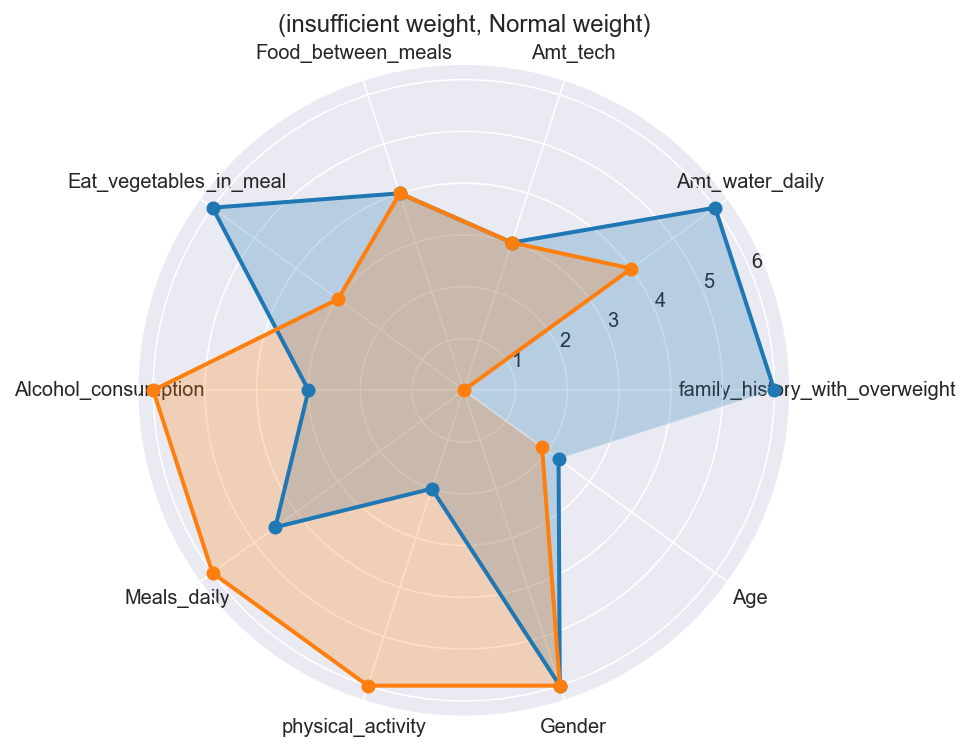

In [25]:
radar_labels = np.array([features[i] for i in np_array_indices])
obesity_level_3_values = your_data.loc[your_data['Weight_category'] == 0]
obesity_max_row = obesity_level_3_values.loc[obesity_level_3_values['Weight'] ==
                                             obesity_level_3_values['Weight'].max()] #get the max value of the weight feature in the obesity type 6 category
obesity_stats = obesity_max_row[[features[i] for i in np_array_indices]].values
max_values = [your_data[features[i]].max() for i in np_array_indices]
print(max_values)
obesity_stats = obesity_stats.reshape(-1)
for index,value in enumerate(obesity_stats):
    obesity_stats[index] = gabby_normalizer(value,max_values[index],6)
print(obesity_stats)
normal_weight_values = your_data.loc[your_data['Weight_category'] == 1]
normal_weight_max_row = normal_weight_values.loc[normal_weight_values['Weight'] ==
                                                 normal_weight_values['Weight'].max()]
normal_stats = normal_weight_max_row[[features[i] for i in np_array_indices]].values
normal_stats = normal_stats.reshape(-1)
for index,value in enumerate(normal_stats):
    normal_stats[index] = gabby_normalizer(value,max_values[index],6)
angles = np.linspace(0, 2 * np.pi, len(obesity_stats), endpoint=False)
obesity_stats = np.concatenate((obesity_stats,[obesity_stats[0]]),axis=None)
normal_stats = np.concatenate((normal_stats,[normal_stats[0]]),axis=None)
figure = plt.show()
_, ax = plt.subplots(figsize=(6,6),subplot_kw=dict(polar=True))
ax.plot(angles, obesity_stats[:10],'-o', linewidth=2)
ax.plot(angles, normal_stats[:10],'-o',linewidth=2)
ax.fill(angles, obesity_stats[:10],alpha=0.25)
ax.fill(angles,normal_stats[:10],alpha=0.25)
ax.set_thetagrids((angles * 180/np.pi)[0:10],[features[i] for i in np_array_indices])
ax.set_title('(insufficient weight, Normal weight)')
ax.grid(True)

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
predicted_data = rf_model.predict(X_test)
accuracy = accuracy_score(Y_test,predicted_data)
confusion_matx = confusion_matrix(Y_test,predicted_data)
class_report = classification_report(Y_test,predicted_data)
print('your accuracy is %.2f'%accuracy)
print(confusion_matx)
print(class_report)

your accuracy is 0.83
[[55  2  2  2  0  0  0]
 [ 5 30  3  3  3  1  0]
 [ 3  7 44  2  4  1  0]
 [ 0  3  2 46  4  3  2]
 [ 2  5  2  5 64  1  0]
 [ 0  2  0  1  1 50  0]
 [ 0  0  0  1  0  0 62]]
              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87        61
         1.0       0.61      0.67      0.64        45
         2.0       0.83      0.72      0.77        61
         3.0       0.77      0.77      0.77        60
         4.0       0.84      0.81      0.83        79
         5.0       0.89      0.93      0.91        54
         6.0       0.97      0.98      0.98        63

    accuracy                           0.83       423
   macro avg       0.82      0.83      0.82       423
weighted avg       0.83      0.83      0.83       423

